In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("SAheart.csv")
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,No
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,Si
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,No
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,No


### How many records are present in the dataset? Print the metadata information of the dataset.

In [2]:
df.shape

(462, 10)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 36.2+ KB


### Draw a bar plot to show the number of persons having CHD or not in comparison to they having family history of the disease or not.

In [4]:
import matplotlib.pyplot as plt

No    302
Si    160
Name: chd, dtype: int64
Absent     270
Present    192
Name: famhist, dtype: int64


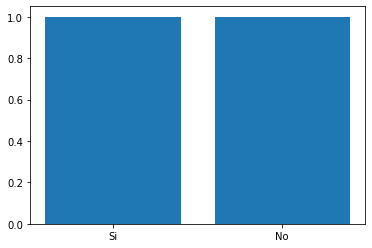

In [5]:
x=df["famhist"]=="Absent"
y=df["chd"]
plt.bar(y,x)
print(df["chd"].value_counts())
print(df["famhist"].value_counts())

In [9]:
cmp=pd.crosstab(index=df["chd"],columns=df["famhist"])

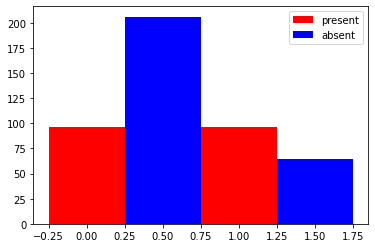

In [15]:
r=np.arange(2)
plt.bar(r,cmp["Present"],width=0.5,color="red",label="present")
plt.bar(r+0.5,cmp["Absent"],width=0.5,color="blue",label="absent")
plt.legend()

### Does age have any correlation with sbp? Choose appropriate plot to show the relationship

In [14]:
df["age"].corr(df["sbp"])

0.3887705972765734

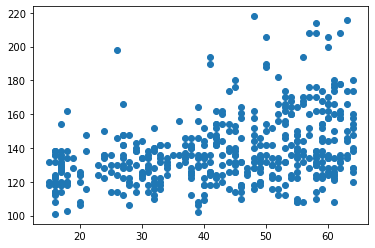

In [17]:
x=df["age"]
y=df["sbp"]
plt.scatter(x,y)

### Compare the distribution of tobacco consumption for persons having CHD and not having CHD

In [37]:
import seaborn as sns
x=df["chd"]
x

0      Si
1      Si
2      No
3      Si
4      Si
       ..
457    No
458    Si
459    No
460    No
461    Si
Name: chd, Length: 462, dtype: object

In [36]:
y=df["tobacco"]
y

0      12.00
1       0.01
2       0.08
3       7.50
4      13.60
       ...  
457     0.40
458     4.20
459     3.00
460     5.40
461     0.00
Name: tobacco, Length: 462, dtype: float64

<BarContainer object of 462 artists>

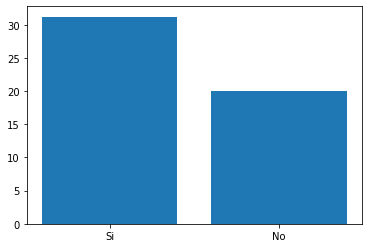

In [38]:
plt.bar(x,y)

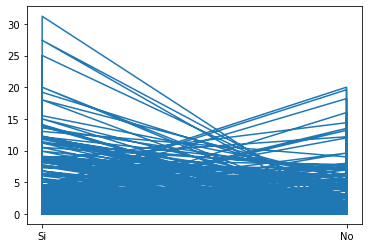

In [41]:
plt.plot(x,y)

### How are the parameters sbp, obesity, age and ldl correlated? Choose the right plot to show the relationships.

In [16]:
df["sbp"].corr(df["obesity"])

0.2380666095712489

In [17]:
df.corr()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
sbp,1.000000,0.212247,0.158296,0.356500,-0.057454,0.238067,0.140096,0.388771
tobacco,0.212247,1.000000,0.158905,0.286640,-0.014608,0.124529,0.200813,0.450330
ldl,0.158296,0.158905,1.000000,0.440432,0.044048,0.330506,-0.033403,0.311799
adiposity,0.356500,0.286640,0.440432,1.000000,-0.043144,0.716556,0.100330,0.625954
typea,-0.057454,-0.014608,0.044048,-0.043144,1.000000,0.074006,0.039498,-0.102606
obesity,0.238067,0.124529,0.330506,0.716556,0.074006,1.000000,0.051620,0.291777
alcohol,0.140096,0.200813,-0.033403,0.100330,0.039498,0.051620,1.000000,0.101125
age,0.388771,0.450330,0.311799,0.625954,-0.102606,0.291777,0.101125,1.000000


### Derive a new column called agegroup from age column where persons falling in different age ranges are categorized as below.
#### (0–15): young
##### (15–35): adults
###### (35–55): mid
##### (55–): old


In [34]:
df["agegroup"]=df["age"]
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si,52
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si,63
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No,46
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si,58
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si,49
...,...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,No,58
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,Si,52
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,No,55
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,No,40


In [35]:
a=len(df["agegroup"])
a

462

In [36]:
for i in range(a):
    if (df["agegroup"][i]>1 and df["agegroup"][i]<=15):
        df["agegroup"][i]="young"
    elif(df["agegroup"][i]>15 and df["agegroup"][i]<=35):
        df["agegroup"][i]="adults"
    elif(df["agegroup"][i]>35 and df["agegroup"][i]<=55):
        df["agegroup"][i]="mid"
    else:
        df["agegroup"][i]="old"
        

C:\Users\PRIYANKA\AppData\Local\Temp\ipykernel_4152\3544632312.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["agegroup"][i]="mid"


In [37]:
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,agegroup
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,Si,mid
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,Si,old
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,No,mid
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,Si,old
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,Si,mid
...,...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,No,old
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,Si,mid
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,No,mid
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,No,mid


#### Find out the number of CHD cases in different age categories. Do a barplot and sort them in the order of age groups.

In [38]:
df["agegroup"].unique()

array(['mid', 'old', 'adults', 'young'], dtype=object)

In [39]:
a=df[df["agegroup"]=="young"]["chd"]

In [41]:
a.count()

3

In [44]:
b=df[df["agegroup"]=="old"]["chd"]
b.count()

114

In [45]:
c=df[df["agegroup"]=="adults"]["chd"]
c.count()

141

In [47]:
d=df[df["agegroup"]=="mid"]["chd"]
d.count()

204

<BarContainer object of 462 artists>

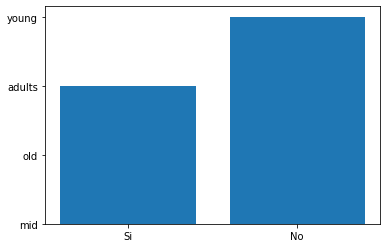

In [49]:
x=df["chd"]
y=df["agegroup"]
plt.bar(x,y)